## Observations and Insights 

In [61]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
# Read in CSV data files for Mouse Metadata & Study Results
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
# Drop all rows from study_results containing the Mouse ID with duplicate timepoint
study_results_deduped = study_results[study_results["Mouse ID"] != "g989"] 
# Combine the data into a single dataset by merging on column Mouse ID
full_data = study_results_deduped.merge(mouse_metadata,how = 'left', left_on = 'Mouse ID', right_on = 'Mouse ID')
full_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1875,r944,45,41.581521,2,Capomulin,Male,12,25
1876,u364,45,31.023923,3,Capomulin,Male,18,17
1877,p438,45,61.433892,1,Ceftamin,Female,11,26
1878,x773,45,58.634971,4,Placebo,Female,21,30


In [34]:
# Checking the number of mice.
mouse_count_list = pd.unique(full_data["Mouse ID"])
mouse_count = len(mouse_count_list)
mouse_count
mouse_count_df = pd.DataFrame({
    "Mouse Count" : [mouse_count]
})
mouse_count_df

,Mouse Count
0,248


In [35]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
grouped_df = study_results.groupby(['Timepoint'])
mouse_dupes = grouped_df['Mouse ID'].value_counts()
mouse_dupes_df = pd.DataFrame({"Mouse Count":mouse_dupes})
mouse_dupes_df.sort_values('Mouse Count', ascending = False)
mouse_dupes_df
# In the mouse_dupes_df print, we can see that Mouse ID 'g989' is the only Mouse with duplicate Timepoint data

Mouse Count
Timepoint Mouse ID             
0         g989                2
          a203                1
          a251                1
          a262                1
          a275                1
...                         ...
45        y865                1
          z578                1
          z581                1
          z795                1
          z969                1

[1888 rows x 1 columns]

In [36]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# I already did this in the first cell. Print 'full_data' to see results

In [37]:
# Checking the number of mice in the clean DataFrame.
full_data['Mouse ID'].value_counts() 
# This shows that there are 248 mice remaining in the 'clean' dataset, after dropping the 1 duplicate mouse

f345    10
e213    10
g288    10
m546    10
n364    10
        ..
x226     1
o848     1
t573     1
n482     1
d133     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [38]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_df = full_data.groupby(["Drug Regimen"]).mean()
mean_str = mean_df["Tumor Volume (mm3)"]
median_df = full_data.groupby(["Drug Regimen"]).median()
median_str = median_df["Tumor Volume (mm3)"]
var_df = full_data.groupby(["Drug Regimen"]).var()
var_str = var_df["Tumor Volume (mm3)"]
stdev_df = full_data.groupby(["Drug Regimen"]).std()
stdev_str = stdev_df["Tumor Volume (mm3)"]
SEM_df = full_data.groupby(["Drug Regimen"]).sem()
SEM_str = SEM_df["Tumor Volume (mm3)"]
# Create a dictionary to store all of the stats by columns
data_dict = {'Mean Tumor Volume (mm3)': mean_str,
        'Median Tumor Volume (mm3)': median_str,
        'Variance Tumor Volume (mm3)': var_str,
        'Std Dev Tumor Volume (mm3)': stdev_str,
        'SEM Tumor Volume (mm3)': SEM_str
       }
# Create dataframe summarizing the stats by drug regimen 
summary_stats_df = pd.DataFrame (data_dict, columns = ['Mean Tumor Volume (mm3)','Median Tumor Volume (mm3)','Variance Tumor Volume (mm3)','Std Dev Tumor Volume (mm3)','SEM Tumor Volume (mm3)'])
summary_stats_df


,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance Tumor Volume (mm3),Std Dev Tumor Volume (mm3),SEM Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [39]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
full_data.agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})

,Tumor Volume (mm3)
mean,50.435293
median,48.933454
var,79.462907
std,8.914197
sem,0.205591


## Bar and Pie Charts

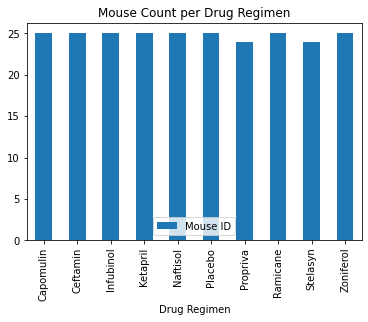

In [69]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
# x-axis: drug regimen, y-axis: count of mice
mouse_drug_df = full_data[["Drug Regimen","Mouse ID"]]
data = mouse_drug_df.groupby(["Drug Regimen"]).nunique()
data_df = data[["Mouse ID"]]
data_df.plot(kind="bar",title="Mouse Count per Drug Regimen")

Text(0.5, 0, 'Drug Regimen')

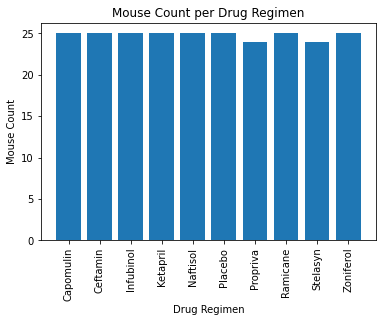

In [80]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
data_for_chart = data_df.reset_index(level=0, inplace=False)
plt.bar(data_for_chart["Drug Regimen"], data_for_chart["Mouse ID"])
plt.xticks(rotation='vertical')
plt.title("Mouse Count per Drug Regimen")
plt.ylabel("Mouse Count")
plt.xlabel("Drug Regimen")

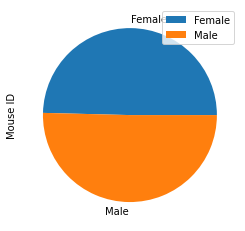

In [108]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_metadata_deduped = mouse_metadata[mouse_metadata["Mouse ID"] != "g989"] 
mouse_metadata_deduped_df = mouse_metadata_deduped[["Mouse ID","Sex"]]
mouse_gender = mouse_metadata_deduped_df.groupby(["Sex"]).count()
mouse_gender.plot.pie(y="Mouse ID")

([<matplotlib.patches.Wedge at 0x2232cd84dd8>,
 [Text(0.013934097579311265, 1.0999117423341975, ''),
  Text(-0.0139340975793114, -1.0999117423341975, '')])

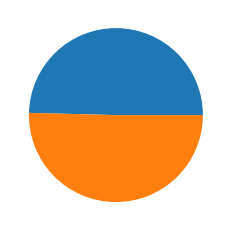

In [103]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_gender["Mouse ID"])

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
